<a href="https://colab.research.google.com/github/djdumpling/Machine-Learning-Prince-/blob/main/9_3_Ensembling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [ ]:
def true_function(x):
  y = np.exp(np.sin(x*(2*np.pi)))
  return y

In [ ]:
def generate_data(n_data, sigma_y = 0.3):
  x = np.ones(n_data)
  for i in range(n_data):
    # np.random.uniform(lower bound, upper bound, size/amount generated)
    # quasi uniform generation
    x[i] = np.random.uniform(i/n_data, (i+1)/n_data, 1)

  y = np.ones(n_data)
  for i in range(n_data):
    y[i] = true_function(x[i])
    y[i] += np.random.normal(0, sigma_y, 1)

  return x,y

In [ ]:
def plot_function(x_func, y_func, x_data = None, y_data = None, x_model = None, y_model = None, sigma_func = None, sigma_model=None):

    fig,ax = plt.subplots()
    ax.plot(x_func, y_func, 'k-')
    if sigma_func is not None:
      ax.fill_between(x_func, y_func-2*sigma_func, y_func+2*sigma_func, color='lightgray')

    if x_data is not None:
        ax.plot(x_data, y_data, 'o', color='#d18362')

    if x_model is not None:
        ax.plot(x_model, y_model, '-', color='#7fe7de')

    if sigma_model is not None:
      ax.fill_between(x_model, y_model-2*sigma_model, y_model+2*sigma_model, color='lightgray')

    ax.set_xlim(0,1)
    ax.set_xlabel('Input, x')
    ax.set_ylabel('Output, y')
    plt.show()

<ipython-input-6-d0ffcc97e65d>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = np.random.uniform(i/n_data, (i+1)/n_data, 1)
<ipython-input-6-d0ffcc97e65d>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] += np.random.normal(0, sigma_y, 1)


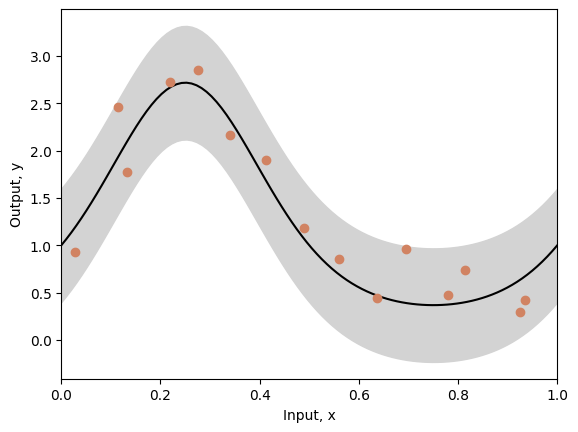

In [ ]:
# np.linspace(start, stop, num)
x_func = np.linspace(0, 1.0, 100)
y_func = true_function(x_func)

np.random.seed(1)
sigma_func = 0.3
n_data = 15
x_data, y_data = generate_data(n_data, sigma_func)

plot_function(x_func, y_func, x_data, y_data, sigma_func = sigma_func)

In [ ]:
def network(x, beta, omega):
  n_hidden = omega.shape[0]

  y = np.zeros_like(x)
  for c_hidden in range(n_hidden):
    # Evaluate activations based on shifted lines
    line_vals = x - c_hidden/n_hidden
    h = line_vals * (line_vals > 0)
    # Weight activations by omega parameters and sum
    y = y + omega[c_hidden] * h
  y = y + beta

  return y

In [ ]:
# This fits the n_hidden+1 parameters (see fig 8.4a) in closed form.
# If you have studied linear algebra, then you will know it is a least
# squares solution of the form (A^TA)^-1A^Tb.  If you don't recognize that,
# then just take it on trust that this gives you the best possible solution.

def fit_model_closed_form(x,y,n_hidden):
  n_data = len(x)
  A = np.ones((n_data, n_hidden+1))
  for i in range(n_data):
      for j in range(1,n_hidden+1):
          # Compute preactivation
          A[i,j] = x[i]-(j-1)/n_hidden
          # Apply the ReLU function
          if A[i,j] < 0:
              A[i,j] = 0;

  # Add a tiny bit of regularization
  reg_value = 0.00001
  regMat = reg_value * np.identity(n_hidden+1)
  regMat[0,0] = 0

  ATA = np.matmul(np.transpose(A), A) +regMat
  ATAInv = np.linalg.inv(ATA)
  ATAInvAT = np.matmul(ATAInv, np.transpose(A))
  beta_omega = np.matmul(ATAInvAT,y)
  beta = beta_omega[0]
  omega = beta_omega[1:]

  return beta, omega

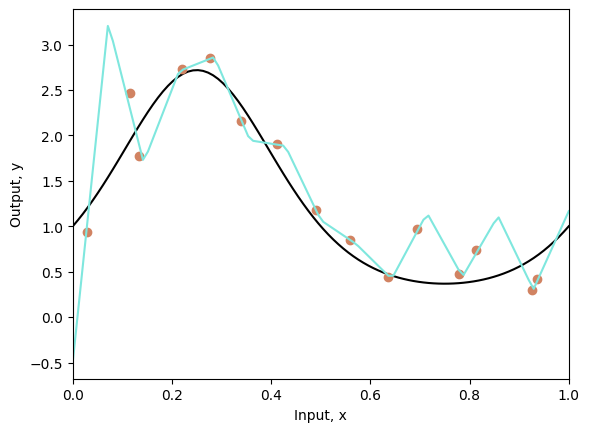

Mean square error = 0.195


In [ ]:
beta, omega = fit_model_closed_form(x_data, y_data, n_hidden=14)

x_model = np.linspace(0,1.0,100)
y_model = network(x_model, beta, omega)

plot_function(x_func, y_func, x_data, y_data, x_model, y_model)

mean_sq_error = np.mean((y_model-y_func) * (y_model-y_func))
print(f"Mean square error = {mean_sq_error:3.3f}")

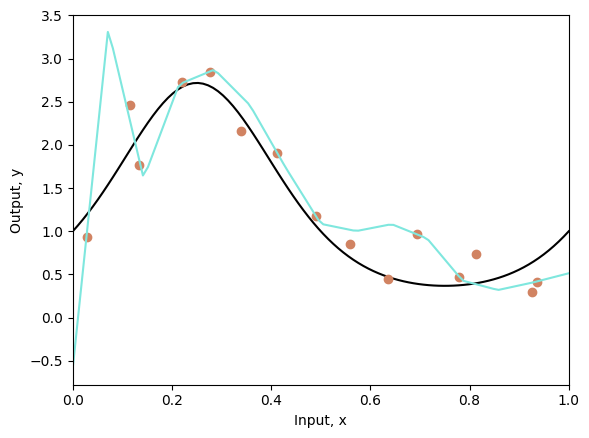

Mean square error = 0.230


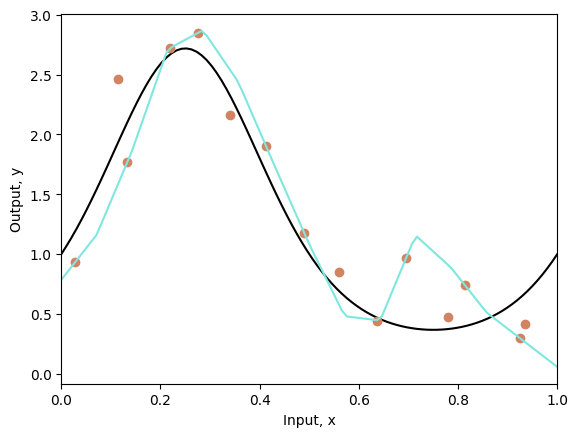

Mean square error = 0.118


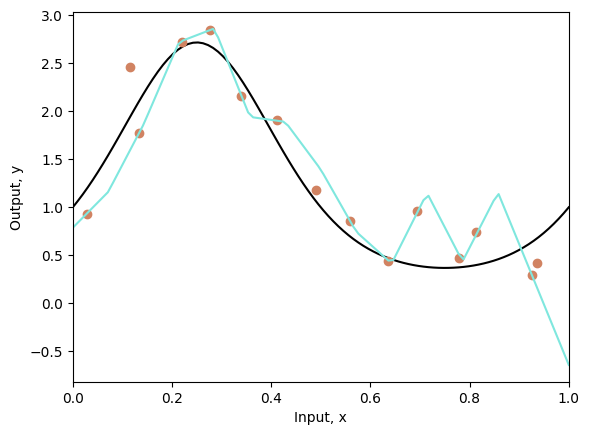

Mean square error = 0.183


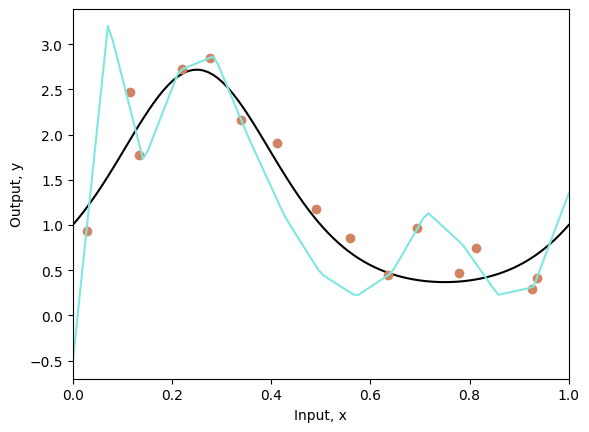

Mean square error = 0.236


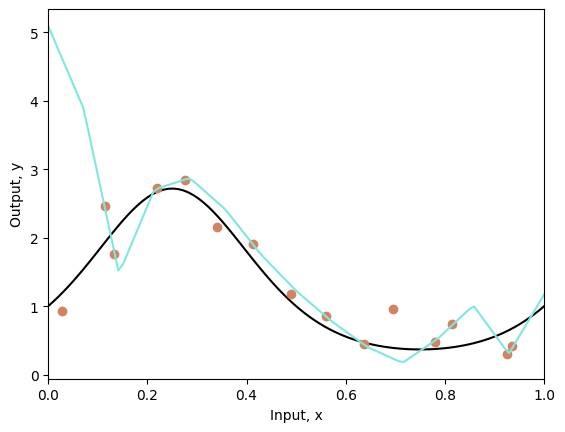

Mean square error = 0.992


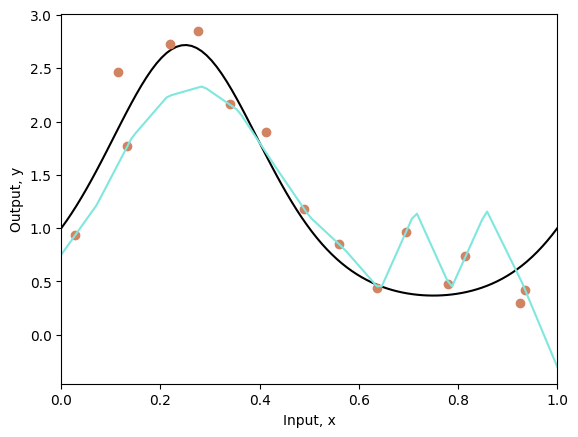

Mean square error = 0.150


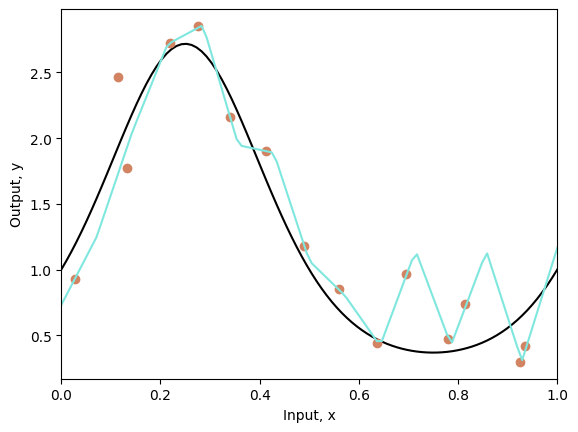

Mean square error = 0.071


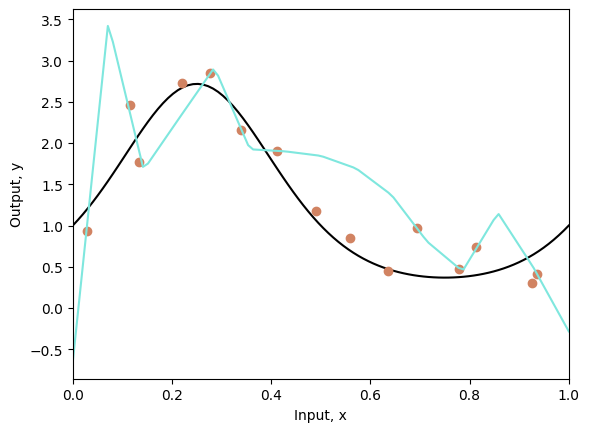

Mean square error = 0.462


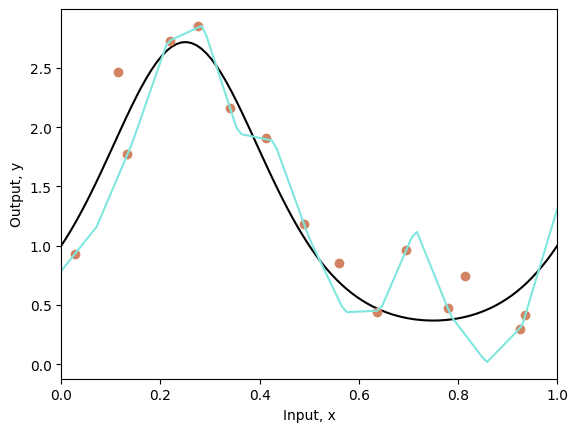

Mean square error = 0.073


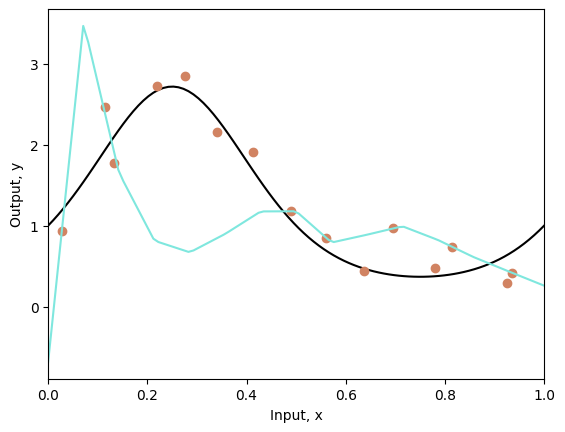

Mean square error = 0.887


In [ ]:
n_model = 10
# Array to store the prediction from all of our models
all_y_model = np.zeros((n_model, len(y_model)))

# For each model
for c_model in range(n_model):
    # TODO Sample data indices with replacement (use np.random.choice)
    # Replace this line
    resampled_indices = np.random.choice(15, 16, replace = True)

    # Extract the resampled x and y data
    x_data_resampled = x_data[resampled_indices]
    y_data_resampled = y_data[resampled_indices]

    # Fit the model
    beta, omega = fit_model_closed_form(x_data_resampled,y_data_resampled,n_hidden=14)

    # Run the model
    y_model_resampled = network(x_model, beta, omega)

    # Store the results
    all_y_model[c_model,:] = y_model_resampled

    # Draw the function and the model
    plot_function(x_func, y_func, x_data,y_data, x_model, y_model_resampled)

    # Compute the mean squared error between the fitted model (cyan) and the true curve (black)
    mean_sq_error = np.mean((y_model_resampled-y_func) * (y_model_resampled-y_func))
    print(f"Mean square error = {mean_sq_error:3.3f}")

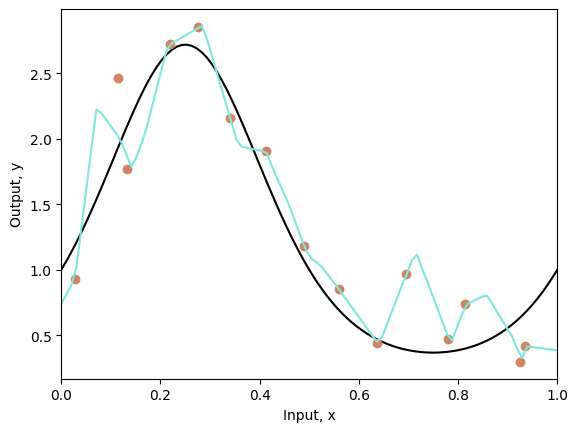

Mean square error = 0.084


In [ ]:
# axis = 0: performing operation on every column
# axis = 1: performing operation on every row
y_model_median = np.median(all_y_model, axis = 0)

# Draw the function and the model
plot_function(x_func, y_func, x_data,y_data, x_model, y_model_median)

# Compute the mean squared error between the fitted model (cyan) and the true curve (black)
mean_sq_error = np.mean((y_model_median-y_func) * (y_model_median-y_func))
print(f"Mean square error = {mean_sq_error:3.3f}")

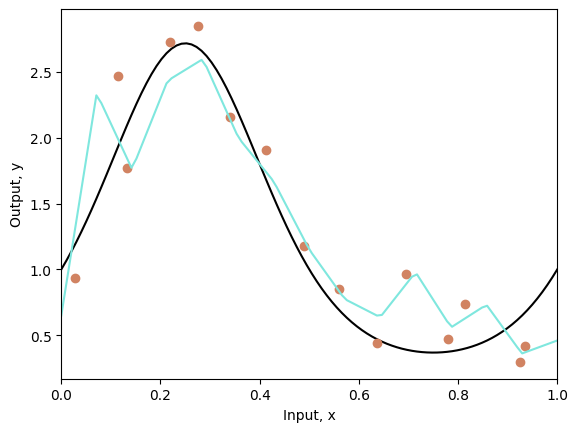

Mean square error = 0.086


In [ ]:
# axis = 0: performing operation on every column
# axis = 1: performing operation on every row

y_model_mean = np.mean(all_y_model, axis = 0)

# Draw the function and the model
plot_function(x_func, y_func, x_data,y_data, x_model, y_model_mean)

# Compute the mean squared error between the fitted model (cyan) and the true curve (black)
mean_sq_error = np.mean((y_model_mean-y_func) * (y_model_mean-y_func))
print(f"Mean square error = {mean_sq_error:3.3f}")